# 類似度・hash化

同一の画像であることを判別したり、画像の類似度を測る方法について。


## Average Hash

1. 画像を8 x 8など小さいサイズに縮小し、グレースケールなど特定の色の輝度だけにする
2. ピクセル全体の平均値と、各ピクセルの値とを判定し、平均以上なら1、以下なら0とする
3. 2つの画像を比較する際は、各ピクセルの{0, 1}の値の不一致な数や比率（一致度）で判定


### 例

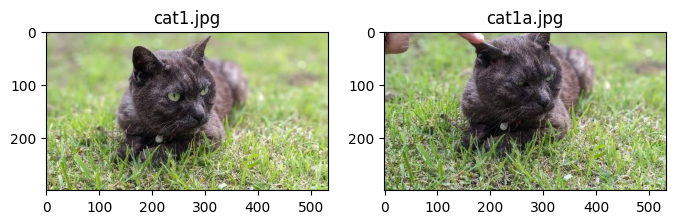

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

cat1 = Image.open("./sample_images/cat1.jpg")
cat1a = Image.open("./sample_images/cat1a.jpg")

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cat1)
plt.title("cat1.jpg")
plt.subplot(1, 2, 2)
plt.imshow(cat1a)
plt.title("cat1a.jpg")
plt.show()


**1. 画像を8 x 8など小さいサイズに縮小し、グレースケールなど特定の色の輝度だけにする**

縮小してグレースケールにして輝度の分布だけにする

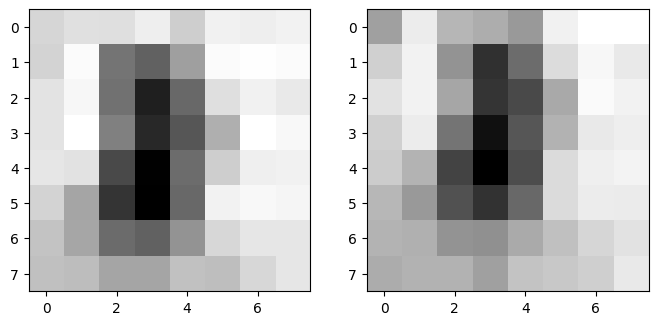

In [2]:
from PIL import Image

hash_size = 8
ANTIALIAS = Image.Resampling.LANCZOS

# 8bit grayscale (L)に変換して縮小
cat1 = cat1.convert('L').resize((hash_size, hash_size), ANTIALIAS)
cat1a = cat1a.convert('L').resize((hash_size, hash_size), ANTIALIAS)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cat1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(cat1a, cmap="gray")
plt.show()

**2. ピクセル全体の平均値と、各ピクセルの値とを判定し、平均以上なら1、以下なら0とする**



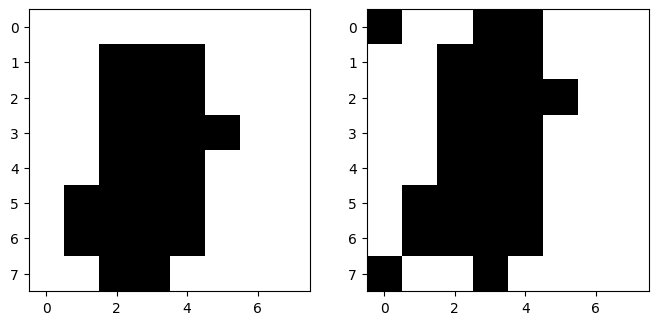

In [3]:
def is_high(image: Image) -> np.array:
    pixels = np.asarray(image)
    avg = np.mean(pixels)
    # 平均より大きいかどうかの0/1に
    is_high = pixels > avg
    return is_high

cat1 = is_high(cat1)
cat1a = is_high(cat1a)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cat1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(cat1a, cmap="gray")
plt.show()

**3. 2つの画像を比較する際は、各ピクセルの{0, 1}の値の不一致な数や比率（一致度）で判定**


In [4]:
# 不一致なピクセル
1 * (cat1 != cat1a)

array([[1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0]])

In [5]:
n_diff = np.count_nonzero(cat1 != cat1a)
print("不一致ピクセル数 :", n_diff)

n_same = np.count_nonzero(cat1 == cat1a)
print(f"一致度 : {n_same / cat1.size:.1%}")

不一致ピクセル数 : 7
一致度 : 89.1%


以上の処理がまとめられたものが [imagehash](https://pypi.org/project/ImageHash/) パッケージの `average_hash`関数

[imagehash/imagehash/__init__.py at master · JohannesBuchner/imagehash](https://github.com/JohannesBuchner/imagehash/blob/master/imagehash/__init__.py#L233)

In [6]:
def average_hash(image: Image, hash_size=10):
    """imagehash.average_hashの実装を真似たもの"""
    # reduce size and complexity, then convert to grayscale
    ANTIALIAS = Image.Resampling.LANCZOS
    image = image.convert('L').resize((hash_size, hash_size), ANTIALIAS)
    # find average pixel value; 'pixels' is an array of the pixel values, ranging from 0 (black) to 255 (white)
    pixels = np.asarray(image)
    avg = np.mean(pixels)
    # 平均よりおおいかどうかで0/1にする
    is_high = pixels > avg
    return is_high


別の画像と判定

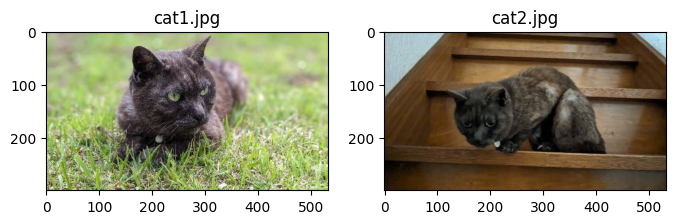

In [7]:
cat1 = Image.open("./sample_images/cat1.jpg")
cat2 = Image.open("./sample_images/cat2.jpg")

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(cat1)
plt.title("cat1.jpg")
plt.subplot(1, 2, 2)
plt.imshow(cat2)
plt.title("cat2.jpg")
plt.show()

In [8]:
is_high1 = average_hash(cat1)
is_high2 = average_hash(cat2)

n_diff = np.count_nonzero(is_high1 != is_high2)
print("不一致ピクセル数 :", n_diff)

n_same = np.count_nonzero(is_high1 == is_high2)
print(f"一致度 : {n_same / is_high1.size:.1%}")

不一致ピクセル数 : 44
一致度 : 56.0%


## OpenCV

最近のopencvでも使えるらしい？

[【Python】OpenCV img_hashモジュールで画像ハッシュ計算・比較](https://zenn.dev/kazuhito/articles/1dc73eeb7e1297)

参考文献を探す場所としてOpenCVのドキュメントが有用

[OpenCV: The module brings implementations of different image hashing algorithms.](https://docs.opencv.org/4.x/d4/d93/group__img__hash.html)


## 参考

- [Looks Like It - The Hacker Factor Blog](https://www.hackerfactor.com/blog/?/archives/432-Looks-Like-It.html)
- [Average Hash解説](https://red-zone.biz/average_hash/)
- [同一画像を判定するためのハッシュ化アルゴリズム #Python - Qiita](https://qiita.com/mamo3gr/items/b93545a0346d8731f03c)
